# 20.2 Netflix Original Film Data Story Telling Assignment

For this story telling assignment, I will be using a dataset containing IMDB scores of Netflix Original Films obtained from kaggle.com.

The dataset contains information such as:
- Title
- Genre
- Original premiere date
- Runtime in minutes
- IMDB scores (as of 06/01/21)
- Languages currently available (as of 06/01/21)

The main goal of this assignment is to explore the data, find trends, and explore that narrative in a creative story driven way that will explain the findings to the audience.


## 20.2.1 Imports

In [147]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(font_scale=1.5)

## 20.2.2 Read CSV File

First step is to read in the CSV file and get a very general understanding of our data.

In [2]:
netflix_data = pd.read_csv('NetflixOriginals.csv')

In [3]:
netflix_data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [4]:
netflix_data.shape

(584, 6)

In [5]:
netflix_data.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


In [6]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


## 20.2.3 Data Cleaning

This section is dedicated to cleaning the data of missing or erroneous data and for adjusting our dataframe to the dtypes we are expecting from it.

In [7]:
#There are no null values in this dataset

netflix_data.isnull().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [8]:
# Chaning the Premiere column to a datetime column

netflix_data['Premiere_dt'] = pd.to_datetime(netflix_data['Premiere'], infer_datetime_format=True)

In [9]:
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Title        584 non-null    object        
 1   Genre        584 non-null    object        
 2   Premiere     584 non-null    object        
 3   Runtime      584 non-null    int64         
 4   IMDB Score   584 non-null    float64       
 5   Language     584 non-null    object        
 6   Premiere_dt  584 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.1+ KB


In [10]:
netflix_data[['Premiere', 'Premiere_dt']]

,Premiere,Premiere_dt
0,"August 5, 2019",2019-08-05
1,"August 21, 2020",2020-08-21
2,"December 26, 2019",2019-12-26
3,"January 19, 2018",2018-01-19
4,"October 30, 2020",2020-10-30
...,...,...
579,"December 31, 2018",2018-12-31
580,"October 9, 2015",2015-10-09
581,"December 16, 2018",2018-12-16
582,"December 8, 2020",2020-12-08


In [11]:
netflix_data.drop('Premiere', axis=1, inplace=True)

In [12]:
# Adding Month and Year Columns

netflix_data['year'] = pd.DatetimeIndex(netflix_data['Premiere_dt']).year
netflix_data['month'] = pd.DatetimeIndex(netflix_data['Premiere_dt']).month

In [13]:
col_names = {'Title':'title', 'Genre':'genre', 'Runtime':'runtime', 
             'IMDB Score':'imdb', 'Language':'language',
             'Premiere_dt':'premiere'}
clean_netflix_df = netflix_data.rename(col_names, axis=1)

In [14]:
clean_netflix_df.head()

,title,genre,runtime,imdb,language,premiere,year,month
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,2019,8
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,2020,8
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,2019,12
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,2018,1
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,2020,10


## 20.2.4 Data Exploration

In [15]:
#Now we can see that the dates range from 12-2014 to 05-2021

clean_netflix_df['premiere'].value_counts().sort_index()

2014-12-13    1
2015-05-22    1
2015-05-29    1
2015-06-26    1
2015-07-17    1
             ..
2021-05-14    3
2021-05-18    1
2021-05-21    1
2021-05-26    3
2021-05-27    1
Name: premiere, Length: 387, dtype: int64

In [16]:
#Netflix Original with the Highest Rating

clean_netflix_df[clean_netflix_df['imdb'] == clean_netflix_df['imdb'].max()]

,title,genre,runtime,imdb,language,premiere,year,month
583,David Attenborough: A Life on Our Planet,Documentary,83,9.0,English,2020-10-04,2020,10


In [17]:
#Netflix Original with the Lowest Rating

clean_netflix_df[clean_netflix_df['imdb'] == clean_netflix_df['imdb'].min()]

,title,genre,runtime,imdb,language,premiere,year,month
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,2019,8


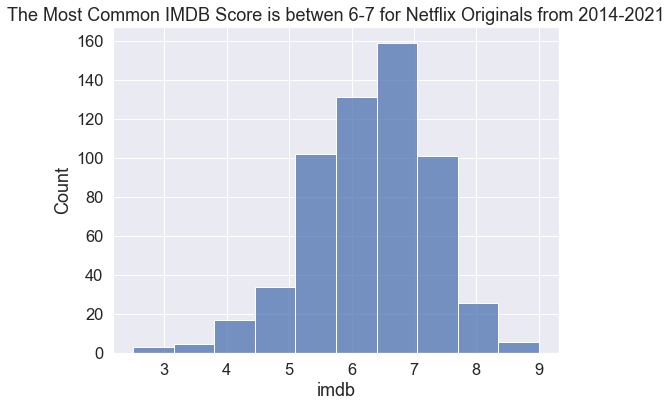

In [148]:

plt.subplots(figsize=(8,6))
sns.histplot(x='imdb', data=clean_netflix_df, bins=10)
plt.title('The Most Common IMDB Score is betwen 6-7 for Netflix Originals from 2014-2021')
plt.show()

In [19]:
avg_mon = clean_netflix_df.groupby('month')['imdb'].mean().reset_index()
avg_mon

,month,imdb
0,1,6.002703
1,2,6.117949
2,3,6.322917
3,4,6.049206
4,5,6.213208
5,6,6.582857
6,7,6.091176
7,8,5.951351
8,9,6.481132
9,10,6.522078


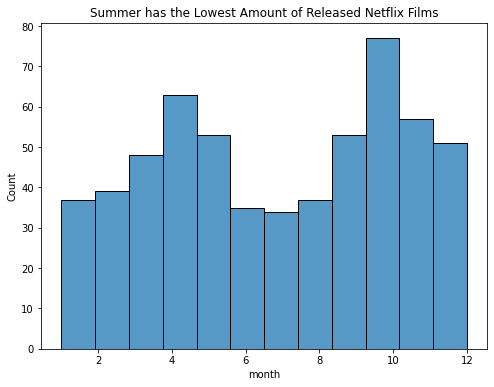

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='month', data=clean_netflix_df, bins=12)
plt.title('Summer has the Lowest Amount of Released Netflix Films')
plt.show()

In [21]:
avg_year = clean_netflix_df.groupby('year')['imdb'].mean().reset_index()
avg_year

,year,imdb
0,2014,6.400000
1,2015,6.877778
2,2016,6.513333
3,2017,6.422727
4,2018,6.360606
5,2019,6.259200
6,2020,6.195082
7,2021,6.046479


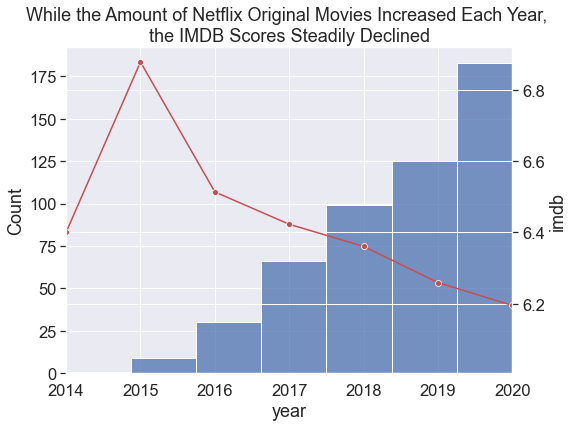

In [149]:
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(x='year', data=clean_netflix_df, bins=8, stat='count', ax=ax)
ax2 = ax.twinx()
sns.lineplot(x='year', y='imdb', data=avg_year, markers=True, marker='o', ax=ax2, color='r')
plt.xlim(2014, 2020)
plt.title('While the Amount of Netflix Original Movies Increased Each Year, \nthe IMDB Scores Steadily Declined')
plt.show()

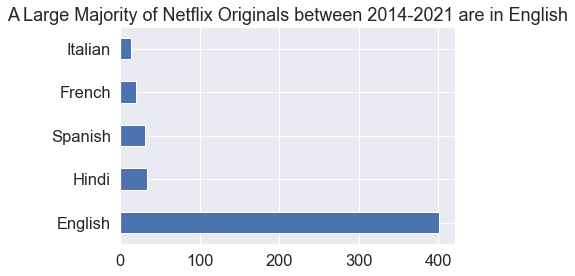

In [150]:
clean_netflix_df.language.value_counts().sort_values(ascending=False).head(5).plot(kind='barh')
plt.title('A Large Majority of Netflix Originals between 2014-2021 are in English')
plt.show()

Text(0.5, 1.0, 'The Top 5 Most Common Genres of Netflix Originals between 2014-2021')

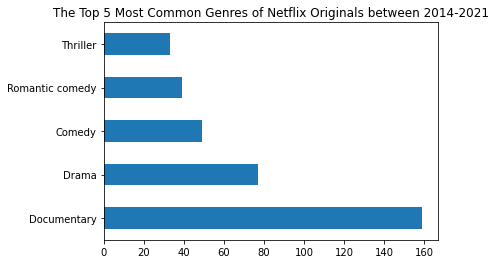

In [24]:
clean_netflix_df.genre.value_counts().sort_values(ascending=False).head().plot(kind='barh')
plt.title('The Top 5 Most Common Genres of Netflix Originals between 2014-2021')

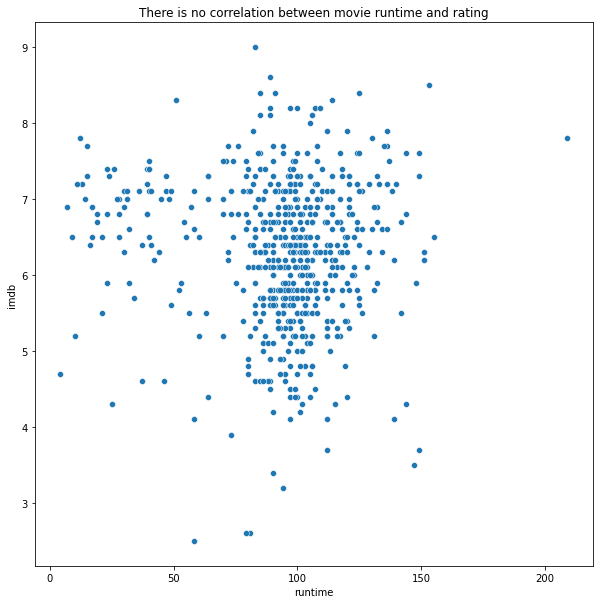

In [35]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x='runtime', y='imdb', data=clean_netflix_df)
plt.title('There is no correlation between movie runtime and rating')
plt.show()

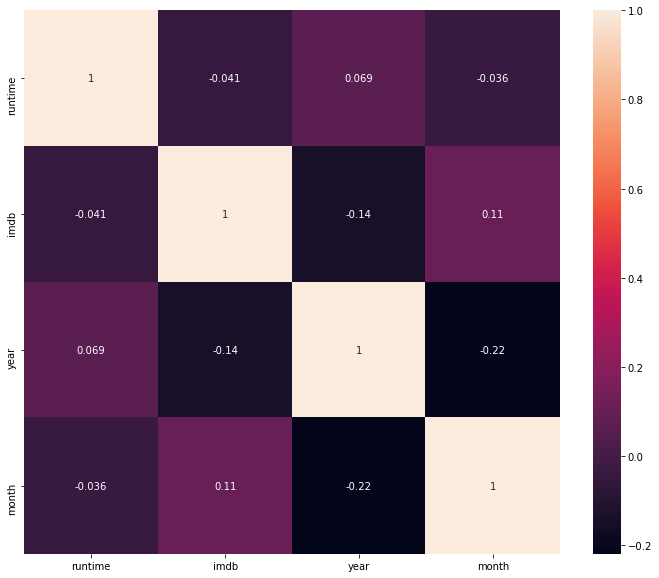

In [41]:
plt.subplots(figsize=(12,10))
sns.heatmap(clean_netflix_df.corr(), annot = True);

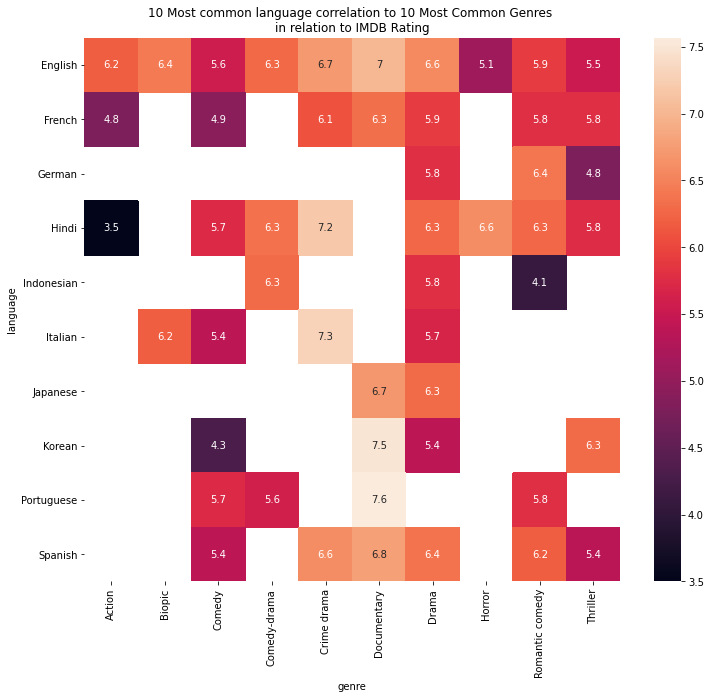

In [144]:
index1 = clean_netflix_df[['language']].value_counts().head(10).reset_index()
language = index1['language']

index2 = clean_netflix_df[['genre']].value_counts().head(10).reset_index()
genres = index2['genre']

df = clean_netflix_df[clean_netflix_df['genre'].isin(genres)& clean_netflix_df['language'].isin(language)]


df_heatmap = df.pivot_table(values='imdb',index='language',
                                     columns=['genre'])

plt.subplots(figsize=(12,10))
sns.heatmap(df_heatmap,annot=True)
plt.title('10 Most Common Language Correlation to 10 Most Common Genres \nin Relation to IMDB Rating')
plt.show()

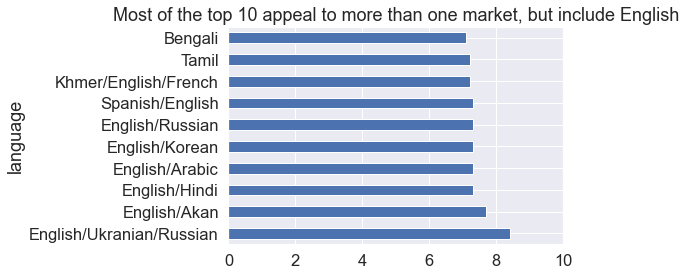

In [168]:
clean_netflix_df.groupby('language')['imdb'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Most of the top 10 appeal to more than one market, but include English')
plt.xlim(0, 10)
plt.show()

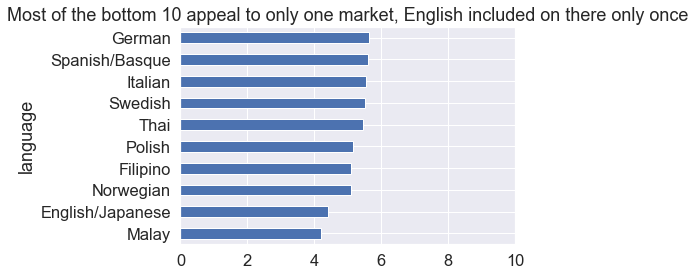

In [169]:
clean_netflix_df.groupby('language')['imdb'].mean().sort_values(ascending=True).head(10).plot(kind='barh')
plt.title('Most of the bottom 10 appeal to only one market, English included on there only once')
plt.xlim(0, 10)
plt.show()

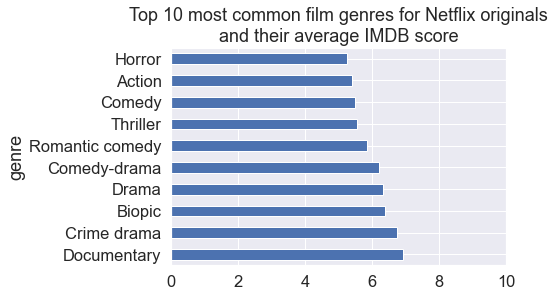

In [185]:
df = clean_netflix_df[clean_netflix_df['genre'].isin(genres)]
df.groupby('genre')['imdb'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 most common film genres for Netflix originals\nand their average IMDB score')
plt.xlim(0,10)
plt.show()

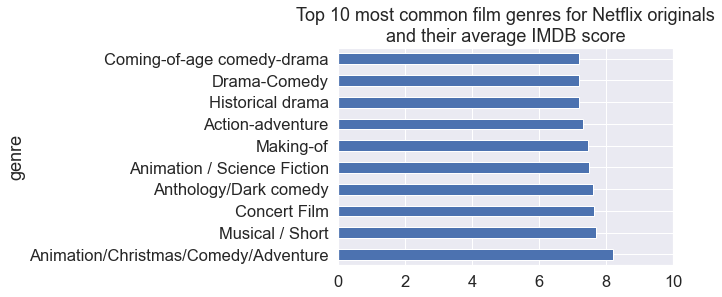

In [186]:
clean_netflix_df.groupby('genre')['imdb'].mean().sort_values(ascending=False).head(10).plot(kind='barh')
plt.title('Top 10 most common film genres for Netflix originals\nand their average IMDB score')
plt.xlim(0,10)
plt.show()

In [189]:
clean_netflix_df[clean_netflix_df['genre']=='Concert Film']

,title,genre,runtime,imdb,language,premiere,year,month
293,"Ariana Grande: Excuse Me, I Love You",Concert Film,97,6.4,English,2020-12-21,2020,12
525,Shawn Mendes: Live in Concert,Concert Film,87,7.4,English,2020-11-25,2020,11
532,"Barbra: The Music, The Mem'ries, The Magic!",Concert Film,108,7.5,English,2017-11-22,2017,11
557,Justin Timberlake + The Tennessee Kids,Concert Film,90,7.7,English,2016-10-12,2016,10
578,Ben Platt: Live from Radio City Music Hall,Concert Film,85,8.4,English,2020-05-20,2020,5
579,Taylor Swift: Reputation Stadium Tour,Concert Film,125,8.4,English,2018-12-31,2018,12


In [195]:
clean_netflix_df[clean_netflix_df['genre']=='Comedy'].shape

(49, 8)